### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
}
.dashed-box tr {
  background-color: white !important;  
}
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint 5</b></span>

<img src="./imgs/california-flag.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Evaluate Polynomial Regression Models
---

### 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🛠️ 5. Prepare the Data

To use **Polynomial Regression**, we need to decide _which features_ will be used/considered first.

### 5.1. Load the cleaned training set

Let's consider the training and testing sets already cleaned (sprint #2):
- Drop duplicated instances (no found)
- Drop instances with `housing_median_age` capped at 52
- Drop instances with `median_house_value` capped at 500001.0

In [3]:
# load the cleaned training set
housing_train = pd.read_csv('./datasets/housing_train_sprint-2.csv')

In [4]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,340900.0,INLAND
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,309200.0,<1H OCEAN
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,322300.0,NEAR BAY
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,394400.0,NEAR OCEAN
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,339500.0,<1H OCEAN


In [5]:
housing_train.shape

(14857, 10)

### 5.2. Quick EDA to get insights about the features

#### **Generate aggregate features**
Let's also analyse the new features created in the previous sprints.

In [6]:
housing_train_eda = housing_train.copy()

housing_train_eda["rooms_per_household"] = housing_train_eda["total_rooms"] / housing_train_eda["households"]
housing_train_eda["bedrooms_per_room"] = housing_train_eda["total_bedrooms"] / housing_train_eda["total_rooms"]
housing_train_eda["population_per_household"] = housing_train_eda["population"] / housing_train_eda["households"]

In [7]:
housing_train_eda

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,340900.0,INLAND,4.557692,0.194093,2.884615
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,309200.0,<1H OCEAN,5.287500,0.203704,2.105208
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,322300.0,NEAR BAY,5.431193,0.190034,3.738532
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,394400.0,NEAR OCEAN,6.595318,0.187120,2.297659
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,339500.0,<1H OCEAN,5.791444,0.172669,2.791444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14852,-124.14,41.06,32.0,1020.0,215.0,421.0,198.0,3.0208,143400.0,NEAR OCEAN,5.151515,0.210784,2.126263
14853,-118.22,33.98,32.0,2643.0,737.0,2784.0,711.0,2.5352,184400.0,<1H OCEAN,3.717300,0.278850,3.915612
14854,-121.86,37.31,24.0,1939.0,652.0,1808.0,625.0,2.2259,112500.0,<1H OCEAN,3.102400,0.336256,2.892800
14855,-121.32,37.96,46.0,1832.0,365.0,975.0,373.0,2.0398,88100.0,INLAND,4.911528,0.199236,2.613941


In [8]:
housing_train_eda.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

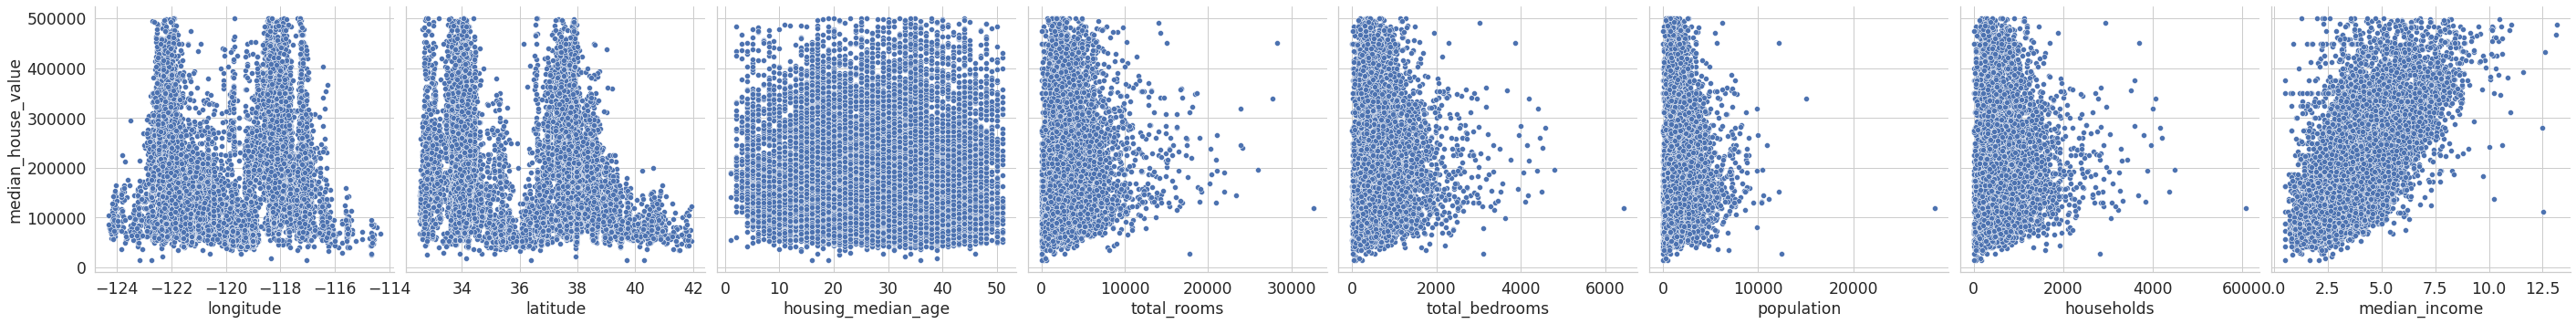

In [9]:
sns.pairplot(housing_train_eda, x_vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'],  y_vars=['median_house_value'], height=5)

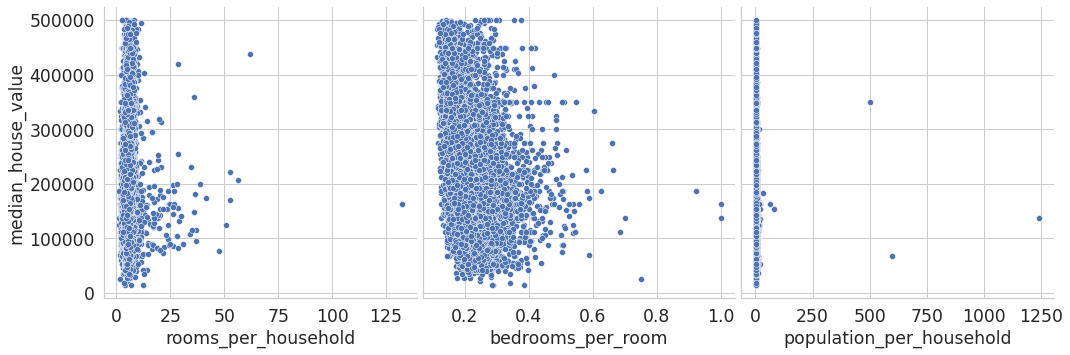

In [10]:
sns.pairplot(housing_train_eda, x_vars=['rooms_per_household', 'bedrooms_per_room', 'population_per_household'],  y_vars=['median_house_value'], height=5)

<br/>

By looking at the scatter plots, we cannot identify a specific relationship (linear, quadratic, cubic, ...) between the _features_ and the _outcome_ (`median_house_value`). <br/>
As observersed in previous sprints, the `median_income` seems to have a _'linear'_ relationship with the `median_house_value`.

The `population_per_household` has significative _outliers_ which impair its visualization. Let's **remove** these outliers to try to improve the visualization.

##### **Removing outliers for `population_per_household`**

In [11]:
housing_train_eda['population_per_household'].describe()

count    14857.000000
mean         3.139659
std         12.074745
min          0.692308
25%          2.468327
50%          2.854167
75%          3.315625
max       1243.333333
Name: population_per_household, dtype: float64

In [12]:
# IQR outlier detection
Q1 = housing_train_eda['population_per_household'].quantile(0.25)
Q3 = housing_train_eda['population_per_household'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (housing_train_eda['population_per_household'] >= lower_bound) & (housing_train_eda['population_per_household'] <= upper_bound)

housing_train_eda_without_outliers = housing_train_eda[mask]
housing_train_eda_without_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,340900.0,INLAND,4.557692,0.194093,2.884615
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,309200.0,<1H OCEAN,5.287500,0.203704,2.105208
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,322300.0,NEAR BAY,5.431193,0.190034,3.738532
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,394400.0,NEAR OCEAN,6.595318,0.187120,2.297659
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,339500.0,<1H OCEAN,5.791444,0.172669,2.791444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14852,-124.14,41.06,32.0,1020.0,215.0,421.0,198.0,3.0208,143400.0,NEAR OCEAN,5.151515,0.210784,2.126263
14853,-118.22,33.98,32.0,2643.0,737.0,2784.0,711.0,2.5352,184400.0,<1H OCEAN,3.717300,0.278850,3.915612
14854,-121.86,37.31,24.0,1939.0,652.0,1808.0,625.0,2.2259,112500.0,<1H OCEAN,3.102400,0.336256,2.892800
14855,-121.32,37.96,46.0,1832.0,365.0,975.0,373.0,2.0398,88100.0,INLAND,4.911528,0.199236,2.613941


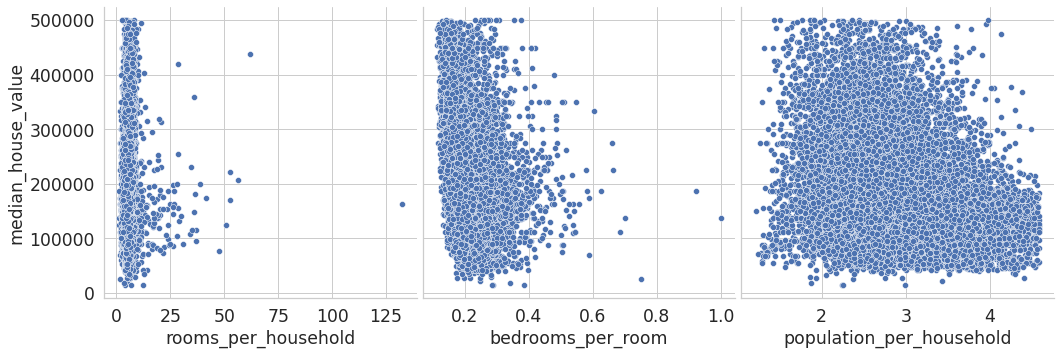

In [13]:
sns.pairplot(housing_train_eda_without_outliers, x_vars=['rooms_per_household', 'bedrooms_per_room', 'population_per_household'],  y_vars=['median_house_value'], height=5)

Now, we can see the true dispersion of the `population_per_household` and the `median_house_value`. However there is not a clear relationship between them.

Let's then consider two scenarios for **Polynomial Regression**
1. Use _only_ the `median_income`.
2. Use _all features_ except those that generated the aggregate features (`total_rooms`, `total_bedrooms`, `population`, `household`).

### 5.3. Separate the _features_ and the _target outcome_

In [14]:
# store the target outcome into a numpy array
y_train = housing_train['median_house_value'].values

# overwrite the dataframe with only the features  
housing_train = housing_train.drop(columns=['median_house_value'])

### 5.4. Preprocessing Pipelines

It is indicated to apply the _polynomial feature transformation_ **before** _feature scaling_. <br/>
There are two good reasons for that:

**1. Loss of signal**

When creating _feature interactions_, we generate values that are _multiples_, _squares_, _cubics_, etc, _ of themselves. <br/>
When we perform _feature scaling_, we convert original values (signals) to a given scale, for example, between -3 and +3 for _standardization_. <br/>

Creating _polynomial features_ from these scaled data will get values with a _magnitude **smaller** than the original_. <br/>
For example, imagine generating polynomial features from values between 0 and 1 by each other. We can only end up with more values between 0 and 1.

The purpose of **Polynomial Feature Transformation** is to **increase signal**. To retain this _increased signal_, we had better generate the polynomial features **first** then apply feature scaling. <br/><br/>



**2. Making random negatives**

Depending on the feature scaling strategy, we can turn a set of _only positive values_ into **positive and negative values** (for example, _standardization_). <br/>
When multiplying _negative_ by _positive_, during _polynomial feature transformation_, you get **negative**.

Following this to our data will create **negative values** from previously **all-positive values**. <br/><br/>

_Source: https://samchaaa.medium.com/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d_

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>For this initial evaluation, let's consider the <b>default parameters</b> of <code>PolynomialFeatures</code> but the <code>include_bias</code>.</td>
</tr>
<tr>
    <td></td>
    <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html</a></td>
</tr>
</table><br/><br/>

#### **Scenario 1**

In [15]:
# pipeline for numerical
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

attributes_scenario_1 = ['median_income']

pipeline_scenario_1 = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('poly_feat_trainsformer', PolynomialFeatures(include_bias=False)),  # default degree = 2
    ('scaler', RobustScaler())
])

# we will just use the ColumnTransformer because it automaticaly filters the required columns for us before performing the pipeline.
# (name, transformer, columns)
preprocessed_pipeline_scenario_1 = ColumnTransformer([
    ("numerical", pipeline_scenario_1, attributes_scenario_1)
])

#### **Scenario 2**

In [16]:
num_attributes = housing_train.columns.drop('ocean_proximity')
num_attributes

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [17]:
# get the integer index of each attribute/column for the filtered dataframe by the numeric attributes:
for index, column_name in enumerate(housing_train[num_attributes]):
    print(f'{index} = {column_name}')

0 = longitude
1 = latitude
2 = housing_median_age
3 = total_rooms
4 = total_bedrooms
5 = population
6 = households
7 = median_income


In [18]:
#### feature engineering method from the Sprint #4
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# our 3 new features are based on some the features: totalrooms, 
# column index
rooms_col_idx, bedrooms_col_idx, population_col_idx, households_col_idx = 3, 4, 5, 6

class HousingFeatEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        n_rows = X.shape[0]
        
        # creating the new features
        rooms_per_household = X[:, rooms_col_idx] / X[:, households_col_idx]
        population_per_household = X[:, population_col_idx] / X[:, households_col_idx]
        bedrooms_per_room = X[:, bedrooms_col_idx] / X[:, rooms_col_idx]
                
        # to concatenate the new array as columns in our feature matrix, we need to reshape them first
        rooms_per_household = rooms_per_household.reshape((n_rows, 1))
        population_per_household = population_per_household.reshape((n_rows, 1))
        bedrooms_per_room = bedrooms_per_room.reshape((n_rows, 1))
        
        # concatenating the new features into the feature matrix
        X_out = np.hstack((X, rooms_per_household, population_per_household, bedrooms_per_room))
        
        return X_out

The columns of **output numpy array** will correspond to: <br/>
0 = longitude <br/>
1 = latitude <br/>
2 = housing_median_age <br/>
3 = total_rooms <br/>
4 = total_bedrooms <br/>
5 = population <br/>
6 = households <br/>
7 = median_income <br/>
8 = rooms_per_household <br/>
9 = population_per_household <br/>
10 = bedrooms_per_room <br/>

To satisfy the scenario 2, we need to **remove/drop** the features `total_rooms`, `total_bedrooms`, `population`, `household`. <br/>
To do this automatically, we can create another **transformer** that removes the corresponding numpy array columns after `HousingFeatEngineering` throughout their column indices. <br/>
Coincidentally, these column indices are _the same_ used in `HousingFeatEngineering`... but, **always be aware of this.**

In [19]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# indices from the columns to be dropped
rooms_col_idx, bedrooms_col_idx, population_col_idx, households_col_idx = 3, 4, 5, 6

class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, verbose=False):
        self.verbose = verbose
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X_out = np.delete(X, [rooms_col_idx, bedrooms_col_idx, population_col_idx, households_col_idx], axis=1)
        
        # for debugging
        if self.verbose:
            np.set_printoptions(suppress=True)
            print('X[:5]')
            print(X[:5])
            print('\nX_out[:5]')
            print(X_out[:5])
        
        return X_out

In [20]:
# pipeline for numerical
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

attributes_scenario_2 = housing_train.columns.drop('ocean_proximity')

pipeline_scenario_2 = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('feat_engineering', HousingFeatEngineering()),
    ('drop_features', DropFeatures(verbose=True)),
    ('poly_feat_trainsformer', PolynomialFeatures(include_bias=False)),  # default degree = 2
    ('scaler', RobustScaler())
])

# we will just use the ColumnTransformer because it automaticaly filters the required columns for us before performing the pipeline.
# (name, transformer, columns)
preprocessed_pipeline_scenario_2 = ColumnTransformer([
    ("numerical", pipeline_scenario_2, attributes_scenario_2)
])

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [21]:
X_train_scenario_1 = preprocessed_pipeline_scenario_1.fit_transform(housing_train)

print(X_train_scenario_1.shape)
print(X_train_scenario_1[:5])

(14857, 2)
[[0.1689414  0.17154454]
 [1.01876055 1.28546246]
 [1.1139619  1.43633315]
 [0.34632264 0.36946925]
 [1.11917048 1.4447391 ]]


In [22]:
X_train_scenario_2 = preprocessed_pipeline_scenario_2.fit_transform(housing_train)
X_train_scenario_2.shape

X[:5]
[[-121.37         37.06         25.          474.           92.
   300.          104.            3.8062        4.55769231    2.88461538
     0.19409283]
 [-118.39         34.14         19.         5076.         1034.
  2021.          960.            5.5683        5.2875        2.10520833
     0.2037037 ]
 [-122.07         37.41         26.         1184.          225.
   815.          218.            5.7657        5.43119266    3.73853211
     0.19003378]
 [-121.92         36.57         42.         3944.          738.
  1374.          598.            4.174         6.59531773    2.29765886
     0.18711968]
 [-118.36         33.82         36.         1083.          187.
   522.          187.            5.7765        5.79144385    2.79144385
     0.17266851]]

X_out[:5]
[[-121.37         37.06         25.            3.8062        4.55769231
     2.88461538    0.19409283]
 [-118.39         34.14         19.            5.5683        5.2875
     2.10520833    0.2037037 ]
 [-122.07      

(14857, 35)

In [23]:
# we already have `y_train`
y_train.shape

(14857,)

### 6.2. Training the Models

In [24]:
# printing function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### **→ Scenario 1**

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# create linear regression
lin_reg_scenario_1 = LinearRegression()  # default parameters

# apply cross-validation
lin_scores_scenario_1 = cross_val_score(lin_reg_scenario_1, X_train_scenario_1, y_train, scoring="neg_mean_squared_error", cv=10)

# compute the RMSE scores
lin_rmse_scores_scenario_1 = np.sqrt(-lin_scores_scenario_1)

In [26]:
display_scores(lin_rmse_scores_scenario_1)

Scores: [72574.87613359 68228.26291466 70849.62462101 70662.03696516
 72389.85308843 73626.84322203 71758.64255541 71363.98070601
 73416.29609473 71848.19559535]
Mean: 71671.86118963771
Standard deviation: 1479.3092469024475


Although the errors are relatively _stable_ across the folds (look at the _standard deviation_), the **cross validation score** (\\$71,671.86 ± \$1,479.30) is _considerably higher_ than that of `Linear Regression` from the previous Sprint (\\$58,371.04 ± \$1,757.91).

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>Although we have created a <code>Pipeline</code> only for <b>preprocessing</b>, we could incorporate <b>all steps/models/transformers</b> (including <code>linear regression</code>) into a <b>single <code>Pipeline</code><b/>.</td>
</tr>
<tr>
    <td></td>
    <td>We will see that in the next sprints.</td>
</tr>
</table><br/><br/>

#### **→ Scenario 2**

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# create linear regression
lin_reg_scenario_2 = LinearRegression()  # default parameters

# apply cross-validatio
lin_scores_scenario_2 = cross_val_score(lin_reg_scenario_2, X_train_scenario_2, y_train, scoring="neg_mean_squared_error", cv=10)

# compute the RMSE scores
lin_rmse_scores_scenario_2 = np.sqrt(-lin_scores_scenario_2)

In [28]:
display_scores(lin_rmse_scores_scenario_2)

Scores: [ 57405.92002901 233245.55863185  54962.44815937  55580.22797493
 164874.5943899  283866.30203533  59787.37868545  63372.67128821
  55710.1188163   56679.82442376]
Mean: 108548.5044434125
Standard deviation: 82250.677695827


<br/>

This **polynomial regression model** is very unstable (look at its _standard deviation_): it presents lower errors in some folds and extremely high ones in other folds. <br/>
It seems that:
- this combination of features is not good; and/or
- the outliers (regardless their nature) are impacting the results; and/or
- the considered degree is not adequate; and/or
- this model is not adequate for this problem.

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>Before ignoring <b>polynomial regression</b> for our problem, we could try to <b><i>fine-tune</i></b> its <i>hyperparameters</i>, especially the <code>degree</code> since it highly impacts the final results, and/or remove outliers.</td>
</tr>
</table><br/><br/>